In [1]:
import os
import sys
import importlib    
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Paths
housing_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/datasets/housing.csv"
python_scripts_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/python-scripts"

#Path initialization so that Python can see where our script lies.
script_dir = os.path.abspath(python_scripts_path) 
sys.path.append(script_dir)

#Imports
from sklearn.model_selection import StratifiedShuffleSplit

from test_set_check import test_set_check

from split_train_test_by_id import split_train_test_by_id
from load_housing_data import load_housing_data


Step 1: Create a Clean set of data

In [6]:
#limits number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) 
#merge "larger than 5" categories into category 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=False) 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

'''
DataFrame's drop function: 
+ creates a copy dataset (call it A) from strat_train_set 
+ removes "median_house_value" from A.
'''
'''
What we are doing here: Split predictors (housing) and labels (housing_labels)
'''

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

print(housing)
print(housing_labels)

KeyError: '[15048, 16369, 9878, 3091, 976, 628, 8803, 14954, 8016, 7438, 26, 12733, 10161, 9836, 6300, 11178, 14301, 9188, 5814, 4964, 15458, 12951, 1218, 1045, 14073, 9260, 3414, 7129, 8201, 7601, 10943, 14425, 5671, 16066, 14020, 14404, 11717, 8757, 804, 14830, 5556, 5818, 12650, 2739, 9618, 14733, 16179, 1706, 13889, 4285, 5123, 5800, 2318, 12388, 14682, 13466, 13564, 12104, 951, 14198, 9914, 227, 287, 10990, 6156, 8033, 13943, 1980, 15833, 16253, 3614, 14, 15763, 5583, 6721, 1750, 7998, 13875, 12701, 1926, 936, 12180, 2855, 11045, 3719, 11311, 730, 4818, 5547, 11640, 6349, 2194, 9216, 16073, 10837, 6425, 6409, 10995, 11039, 13541, 3265, 5473, 10821, 2884, 6745, 1721, 12941, 2851, 4604, 10315, 720, 8619, 1025, 15075, 2339, 7781, 13837, 374, 13584, 15741, 13163, 174, 1166, 13531, 15052, 5884, 8496, 13506, 15785, 7916, 51, 765, 5140, 10733, 2614, 11643, 14811, 16383, 15502, 610, 7317, 15647, 9597, 6862, 11497, 5251, 2014, 3772, 7584, 1839, 16310, 9782, 3011, 10486, 9043, 16307, 13026, 6350, 9024, 3360, 14992, 11888, 16407, 1982, 6478, 6500, 14345, 11495, 1018, 2865, 16030, 14522, 13539, 12737, 5754, 2445, 3509, 12591, 15310, 159, 16316, 9780, 15825, 6178, 5812, 960, 2735, 15764, 2197, 913, 7850, 2005, 9773, 4766, 7409, 11807, 2461, 14529, 33, 13905, 11142, 4960, 1766, 15867, 2928, 14449, 11154, 6261, 3462, 13309, 15646, 9923, 8254, 11346, 10702, 2539, 11166, 3257, 301, 14021, 3602, 6824, 12896, 5591, 3138, 11333, 4905, 2893, 13742, 1744, 9320, 14455, 8275, 11570, 11265, 11663, 16029, 61, 14961, 7683, 7880, 12045, 4452, 4641, 16258, 3018, 9432, 2053, 8540, 7664, 6517, 704, 799, 1509, 14369, 12137, 3040, 6595, 14704, 5333, 10967, 12895, 73, 9546, 7431, 5005, 6902, 5136, 1418, 14575, 869, 8710, 12496, 12800, 11049, 4722, 5950, 3183, 12311, 4881, 1596, 10605, 4491, 4178, 7205, 5388, 13167, 7428, 11155, 3409, 523, 8991, 7750, 3198, 5986, 8418, 2342, 13241, 15939, 13277, 9663, 9735, 4990, 10818, 3816, 1694, 12142, 6890, 2933, 10737, 15271, 12338, 10526, 8894, 3995, 334, 3715, 12642, 10300, 5913, 11782, 12599, 11531, 14679, 10481, 3747, 9886, 15122, 4404, 6701, 4953, 10146, 5350, 13774, 7541, 1941, 9498, 6815, 3861, 11332, 235, 12171, 5077, 2584, 5617, 13550, 2510, 6596, 11670, 5051, 4263, 15482, 638, 15821, 2925, 11781, 10290, 15650, 14188, 10621, 7100, 1304, 1197, 16230, 12073, 8853, 3160, 854, 11470, 12682, 2475, 3209, 8494, 2484, 2966, 15713, 10900, 86, 4700, 10430, 13951, 9089, 15723, 15394, 817, 10970, 11639, 4785, 15652, 943, 4608, 8625, 7894, 11208, 5888, 530, 6901, 10806, 13502, 11122, 14209, 10442, 5793, 4168, 1663, 9236, 5178, 14668, 14401, 2708, 8402, 10099, 7985, 16074, 13959, 1421, 9837, 4119, 13270, 168, 9393, 12302, 12793, 13402, 15863, 9218, 13353, 2491, 14155, 11739, 13332, 2544, 11397, 6447, 4962, 3906, 11458, 8265, 16208, 14697, 2261, 15795, 13712, 10090, 12678, 6187, 9743, 1837, 4858, 11736, 6131, 1833, 6945, 4181, 15211, 2252, 6303, 247, 5892, 16292, 1724, 3075, 1159, 15552, 9824, 7276, 15332, 14712, 7176, 4262, 1787, 16048, 16459, 8800, 7510, 3239, 6294, 2147, 9643, 6378, 15156, 7812, 6343, 10786, 11930, 15030, 9908, 12565, 13851, 3912, 5281, 12652, 14294, 8150, 10717, 3950, 1044, 12090, 7852, 8495, 8773, 8510, 13449, 4699, 5961, 14519, 15950, 13504, 3965, 7889, 11076, 4539, 11442, 3696, 3933, 3324, 2552, 1715, 9504, 6489, 14035, 8821, 4048, 2297, 14158, 3232, 11298, 9680, 11567, 1011, 3142, 12516, 761, 8714, 3591, 263, 15328, 1650, 1279, 11523, 13383, 5160, 5859, 16100, 2770, 2202, 7470, 1084, 8208, 6018, 4590, 3518, 3925, 8164, 15232, 15224, 5358, 11106, 11595, 15797, 11113, 15091, 8981, 182, 8086, 12363, 13696, 2798, 3572, 6043, 7057, 6692, 8188, 3653, 11667, 1193, 10118, 10223, 4661, 4843, 650, 13395, 2347, 707, 2920, 15222, 6184, 1924, 3619, 10097, 3837, 10220, 10527, 2471, 2609, 4776, 5750, 732, 6289, 12968, 3294, 14260, 12623, 1168, 9283, 3655, 8210, 4942, 12813, 4503, 11102, 5568, 9349, 6965, 7264, 7022, 12261, 15801, 15264, 16149, 6669, 2446, 9675, 1091, 11224, 771, 4986, 9847, 13853, 10100, 4763, 6693, 15007, 3632, 2597, 575, 12589, 9053, 6553, 23, 6231, 2433, 15169, 9425, 5285, 10539, 11179, 2740, 10866, 13493, 11629, 6914, 5871, 10674, 8901, 6559, 14651, 15556, 12375, 4941, 15009, 4851, 10119, 2463, 4939, 5985, 8602, 12569, 6077, 14860, 1635, 14338, 1263, 12825, 13183, 2518, 9300, 12824, 15329, 9079, 15952, 2549, 4976, 7521, 1026, 6221, 15140, 6599, 1482, 3859, 7500, 3056, 11238, 14179, 13145, 12255, 15245, 4310, 1005, 13954, 4991, 10018, 11894, 7303, 2540, 10389, 13794, 9896, 4038, 10598, 11247, 10831, 6702, 5387, 10380, 9867, 10021, 1012, 3936, 12182, 3270, 13975, 13404, 5062, 7457, 7468, 7800, 8683, 1684, 2321, 6695, 7760, 3658, 8636, 10064, 9619, 9644, 2890, 13087, 13802, 3229, 12384, 8314, 8262, 5268, 14773, 9325, 13587, 7898, 2635, 8785, 4100, 12175, 8060, 3066, 1361, 1452, 15562, 9598, 13751, 8027, 6331, 11438, 8804, 2509, 8359, 13122, 1657, 758, 1558, 2258, 3314, 6933, 8012, 5040, 12152, 5428, 2592, 1544, 6219, 8509, 9684, 11697, 5175, 7272, 4173, 14841, 2106, 5841, 15250, 8993, 1731, 9101, 4300, 6160, 13350, 14298, 4367, 11353, 4601, 3507, 6420, 5488, 3328, 1207, 1041, 16182, 13097, 7796, 207, 16127, 1393, 12698, 657, 8859, 15131, 4550, 13916, 2826, 10498, 619, 11190, 9756, 7519, 11096, 8243, 9934, 10011, 3620, 1327, 6810, 4148, 7458, 2291, 5180, 8354, 10217, 14412, 5819, 4264, 13067, 15123, 16263, 14701, 3730, 15536, 5809, 12170, 1540, 6894, 14336, 8646, 12810, 9035, 12003, 6679, 9977, 5481, 4118, 4402, 14437, 6459, 10226, 15092, 2779, 9395, 5566, 5371, 3492, 4655, 6021, 603, 2447, 7390, 15443, 8593, 9417, 11621, 13148, 15663, 13471, 8561, 13116, 11623, 1952, 12820, 15217, 11924, 10401, 15331, 3200, 9648, 1141, 8854, 16294, 15608, 6172, 7658, 5528, 9746, 2699, 10331, 13683, 435, 8931, 6323, 2319, 12596, 6727, 4092, 114, 1901, 15190, 5988, 12769, 14666, 8658, 161, 6619, 448, 7006, 8442, 900, 13633, 2745, 11051, 1180, 10421, 3727, 15854, 9468, 8508, 5379, 13586, 6949, 1256, 5593, 8041, 4352, 5784, 1739, 10010, 13877, 12912, 4430, 15656, 11174, 5340, 10884, 15382, 5385, 3726, 10575, 8365, 8031, 10898, 12848, 14649, 8569, 12014, 12448, 2784, 3640, 4199, 1158, 13524, 6113, 3470, 2789, 1838, 13494, 9141, 10926, 5134, 9973, 10199, 6400, 4239, 8348, 1702, 10005, 11524, 7640, 14590, 2152, 13509, 4841, 9011, 13906, 6964, 39, 3193, 3900, 7532, 2619, 3335, 1802, 10639, 6826, 16474, 3178, 15864, 7960, 3191, 4369, 4351, 2569, 11843, 7032, 9996, 8280, 7310, 3404, 10730, 455, 2605, 9293, 2130, 7152, 9153, 9659, 6159, 3519, 8098, 3502, 15970, 8715, 6957, 16456, 12118, 11250, 4796, 9846, 6775, 1076, 3921, 15908, 10630, 8979, 14388, 9000, 502, 3325, 1539, 4532, 12271, 11828, 16236, 13825, 728, 3846, 684, 16112, 1341, 984, 15227, 2839, 8538, 5807, 11042, 15662, 8272, 15684, 10815, 333, 1037, 12634, 12222, 1000, 3947, 5869, 14972, 7348, 9372, 5253, 8530, 397, 2554, 11047, 14268, 3260, 3009, 1765, 5380, 15067, 15379, 8861, 8680, 11564, 1316, 9930, 8520, 7678, 7419, 12379, 1673, 3845, 731, 9883, 8196, 6296, 4882, 11679, 13227, 14671, 12111, 14348, 12704, 10840, 5791, 6188, 8389, 6749, 14943, 12456, 3240, 14937, 4252, 16214, 8835, 8957, 11616, 5217, 4249, 10547, 10557, 12697, 2262, 12223, 13661, 13787, 10581, 9677, 12989, 14100, 13786, 12100, 16054, 7147, 1101, 4871, 14975, 5454, 11108, 14099, 4146, 375, 3072, 14521, 5935, 13198, 13142, 10757, 11641, 6186, 14709, 6277, 1239, 5705, 6355, 990, 11340, 8736, 1228, 13606, 2105, 10871, 8591, 5899, 12465, 14560, 3676, 9282, 851, 1295, 12467, 6662, 12938, 16195, 593, 5238, 15000, 12101, 4302, 14757, 8168, 12036, 8103, 7944, 14389, 12713, 1275, 735, 15098, 13555, 9305, 7038, 3822, 1655, 8069, 15330, 9206, 14846, 6070, 8114, 10554, 2526, 15397, 6026, 1940, 9231, 8345, 1224, 855, 13618, 8560, 7180, 4513, 9686, 7190, 2751, 8398, 10951, 8645, 11086, 13079, 5290, 10697, 13570, 16380, 3622, 4504, 16450, 3359, 8285, 10469, 16442, 13841, 6417, 15769, 8367, 1528, 10473, 9239, 9872, 12953, 15348, 3605, 2449, 4596, 3899, 7681, 8863, 10111, 6603, 14887, 11147, 9866, 12010, 747, 3212, 15399, 2523, 11425, 1415, 12072, 4750, 12367, 2712, 4113, 8858, 3433, 3208, 15570, 4376, 10216, 14218, 5611, 15392, 9191, 10980, 11048, 17, 11145, 4618, 13829, 14451, 2607, 8107, 141, 14118, 3158, 13228, 14612, 185, 8516, 396, 12994, 15671, 12209, 1034, 1108, 10261, 6531, 9279, 6758, 16301, 9526, 12017, 5623, 3812, 4248, 2028, 4505, 2278, 886, 6849, 4299, 7357, 13581, 576, 5152, 4931, 6124, 16239, 14793, 13009, 14281, 11554, 2494, 418, 3603, 13806, 5072, 11476, 15070, 8163, 8014, 11447, 10986, 7355, 1947, 8489, 15279, 1811, 491, 15215, 316, 4286, 14307, 10750, 7529, 905, 7238, 11352, 16065, 6360, 2633, 3755, 2753, 7440, 6302, 9008, 10129, 2286, 4996, 10396, 7928, 10336, 12481, 6098, 5628, 7799, 4501, 11093, 1021, 6365, 4439, 14047, 1870, 7465, 10072, 11642, 5187, 10668, 13804, 10024, 10427, 84, 4331, 8316, 4303, 13041, 14405, 7145, 11222, 6687, 8578, 6760, 16212, 13164, 8219, 6162, 3120, 5376, 10778, 7326, 9616, 5700, 3753, 12019, 2513, 15843, 10641, 6718, 13311, 4614, 9997, 9451, 6946, 3840, 7494, 9459, 11778, 1580, 10346, 15607, 10030, 12510, 641, 6483, 9585, 9532, 6038, 15162, 9428, 8077, 15200, 11136, 13260, 7827, 2250, 3173, 14566, 3536, 306, 4935, 7582, 2979, 7089, 3180, 13008, 5529, 6502, 14274, 8532, 286, 9516, 15366, 11316, 16007, 6022, 8160, 2115, 13382, 8610, 6746, 4429, 4243, 3692, 3189, 12837, 3330, 4117, 3411, 13927, 2214, 1549, 14190, 5887, 1261, 6731, 7497, 11542, 12762, 8289, 16237, 3275, 6863, 9355, 11944, 832, 2093, 11415, 2089, 11571, 13492, 13192, 15202, 4657, 5879, 13702, 13749, 8617, 12995, 14524, 9489, 13023, 4427, 9445, 7815, 8089, 13510, 8399, 13390, 13917, 16377, 9995, 11449, 3375, 7448, 6175, 12117, 4396, 13690, 13237, 2327, 7073, 11419, 750, 13580, 13842, 14850, 12362, 15281, 13279, 11766, 3252, 6398, 16403, 8977, 62, 10434, 13624, 1584, 11287, 8002, 7824, 8062, 9358, 4191, 5395, 9658, 75, 3398, 16415, 1736, 5096, 7282, 6794, 16458, 15489, 5381, 4280, 15, 14596, 14068, 11915, 13636, 14558, 8924, 3663, 3844, 11286, 12461, 11338, 12695, 5498, 2817, 3740, 7568, 9944, 12149, 10675, 10418, 12204, 10620, 1494, 14625, 15772, 12089, 9795, 5831, 1704, 3175, 15642, 13117, 6488, 14715, 5117, 2204, 15722, 9014, 13655, 8904, 16299, 662, 5858, 6080, 16423, 9634, 15226, 7479, 14044, 1502, 15752, 5472, 8230, 10489, 14444, 7598, 2083, 5620, 8477, 16210, 16295, 1476, 367, 7516, 14564, 5677, 9768, 10008, 1960, 534, 3115, 14635, 13223, 4599, 11758, 15406, 3843, 4569, 54, 10068, 13589, 1625, 5840, 8148, 4253, 4936, 5867, 532, 3904, 11728, 13597, 13960, 14201, 15780, 11508, 15748, 16302, 15039, 1048, 9960, 7994, 9721, 1075, 14284, 9763, 5723, 7958, 16140, 12055, 10634, 13507, 1563, 4922, 1496, 9233, 12677, 4921, 14002, 8551, 13082, 2249, 11303, 4103, 6645, 6606, 4712, 13039, 8310, 6054, 7954, 7513, 7656, 4431, 14787, 1155, 11649, 3114, 6883, 6907, 16155, 7235, 11685, 3815, 7739, 13991, 15909, 5295, 6690, 15519, 5734, 14354, 5239, 13436, 11801, 15378, 10977, 11272, 4951, 8111, 1773, 10989, 143, 7324, 1463, 4091, 4772, 5680, 10542, 15368, 12666, 9332, 5451, 16076, 14306, 14331, 4228, 16487, 13501, 5035, 11121, 8507, 7974, 7342, 8572, 12351, 6960, 3148, 6308, 13647, 5909, 792, 2565, 2843, 6325, 15677, 12107, 13431, 11300, 12841, 5992, 6579, 2428, 11334, 5287, 3882, 9989, 12205, 1653, 12249, 101, 15634, 14010, 11982, 753, 10070, 11978, 4169, 11977, 5878, 11406, 9781, 16371, 3721, 1661, 1972, 7156, 14066, 5212, 15038, 10942, 4844, 2134, 8067, 9064, 1352, 12867, 1781, 9845, 11541, 5506, 13, 14592, 8204, 9022, 4955, 2975, 6672, 7736, 14175, 11836, 4122, 1302, 2511, 9641, 15457, 16265, 16332, 11041, 7240, 612, 13478, 2834, 7248, 5086, 694, 10798, 10881, 11172, 12964, 12455, 16498, 8913, 3126, 13985, 2186, 6348, 7114, 2470, 15073, 15828, 3587, 9094, 14122, 11373, 10046, 4731, 10211, 4544, 8919, 5898, 8616, 8546, 5284, 8734, 9021, 2487, 6373, 4644, 11746, 2125, 4564, 9437, 7381, 13062, 5055, 13729, 12432, 6479, 6854, 12337, 15529, 16250, 8782, 9713, 5550, 11721, 13107, 726, 7405, 7593, 12773, 8317, 16145, 15064, 6888, 5293, 11859, 2264, 16336, 4854, 2240, 6073, 12833, 10066, 14367, 8264, 13343, 6058, 9525, 5210, 15526, 16178, 6136, 15675, 10270, 14096, 941, 15643, 13476, 14629, 10391, 96, 15490, 12723, 1145, 9946, 543, 11637, 2379, 6465, 701, 14394, 11342, 5876, 1061, 13779, 8142, 15943, 3067, 4870, 7241, 11821, 6942, 4977, 13892, 14422, 3340, 15899, 12638, 9885, 15354, 5636, 1298, 16092, 11137, 9965, 11413, 11325, 10184, 12310, 10582, 15182, 9494, 7439, 14644, 3554, 3897, 15237, 4492, 13219, 92, 3190, 15865, 10312, 10310, 1643, 6110, 3074, 4933, 1134, 5039, 12600, 10039, 5499, 12042, 13582, 11195, 4381, 15659, 7984, 10662, 156, 4283, 13289, 1489, 11606, 13583, 7394, 465, 14711, 8385, 14959, 10298, 12248, 15617, 9472, 6191, 15590, 7012, 9147, 2586, 9637, 4570, 8589, 3464, 1579, 1521, 12144, 13204, 6106, 15491, 14261, 8823, 9605, 13490, 5065, 2110, 3403, 11088, 14120, 15066, 13125, 6634, 5078, 2591, 3893, 9820, 5094, 8811, 10109, 4804, 15243, 13215, 970, 6347, 14265, 4443, 4457, 8650, 4131, 9823, 13894, 5000, 14199, 3097, 3137, 7094, 10116, 6341, 3520, 12785, 4652, 11044, 7312, 2146, 310, 3082, 5389, 11753, 6556, 9508, 6796, 3513, 3697, 7623, 16134, 10425, 9876, 2876, 3877, 343, 5296, 8606, 7236, 2503, 15911, 13432, 14384, 2373, 7207, 11001, 4767, 10166, 12407, 11466, 4660, 9386, 14692, 16060, 9521, 5832, 1564, 10094, 11536, 3521, 998, 10086, 12343, 15125, 652, 14971, 4240, 1994, 10289, 5139, 6997, 2443, 4030, 3560, 7755, 14842, 1520, 6493, 7673, 11310, 13446, 2398, 3949, 2530, 7626, 781, 11895, 167, 2620, 7662, 10383, 15478, 3768, 14667, 2671, 13981, 2468, 10692, 13734, 12268, 15433, 11156, 1925, 11756, 10191, 8080, 896, 4588, 2049, 12795, 946, 14363, 4267, 5255, 16420, 12717, 5108, 13417, 2168, 6180, 16460, 318, 2391, 5916, 15187, 1110, 13243, 8502, 14867, 5492, 14372, 2166, 4697, 6983, 4728, 10769, 8519, 16254, 14370, 10902, 10909, 1705, 9685, 5318, 4144, 3118, 12320, 13716, 11876, 13557, 6748, 12416, 15473, 7314, 248, 12850, 1320, 8101, 7269, 4545, 9146, 1983, 4757, 3581, 8587, 14924, 16444, 4686, 466, 5245, 1783, 4135, 10108, 16111, 653, 1546, 16013, 15453, 7157, 14312, 6720, 8806, 14189, 1730, 1420, 15714, 7245, 6312, 3866, 3685, 12373, 6779, 1010, 9262, 2024, 3417, 6941, 6838, 5787, 15881, 7485, 6527, 11423, 1072, 4989, 3748, 12105, 14989, 5091, 4948, 13081, 15919, 12106, 6604, 7043, 10591, 10927, 5436, 14027, 4803, 4105, 8428, 1844, 14511, 480, 9764, 11013, 14931, 14217, 11301, 10623, 11319, 8185, 11797, 6057, 12359, 12846, 8426, 13758, 16387, 6827, 3718, 4944, 11426, 4045, 16176, 1602, 801, 1253, 1796, 13394, 387, 14252, 12610, 546, 1910, 10914, 7489, 13832, 12160, 10359, 8043, 8220, 3251, 7275, 674, 79, 9528, 1164, 14808, 3668, 12547, 12242, 10349, 2935, 8607, 1066, 3291, 16097, 6472, 3219, 4788, 12485, 3911, 14801, 8125, 8146, 11422, 5752, 4197, 8708, 12594, 5332, 7740, 2697, 15303, 10534, 4081, 9220, 5126, 8781, 116, 11672, 12450, 7415, 5614, 3055, 1996, 2940, 4042, 16148, 11075, 12999, 15755, 283, 6713, 2848, 9471, 14052, 9303, 3767, 9880, 6196, 12578, 14476, 5761, 125, 9784, 6484, 10530, 15879, 4687, 10105, 6928, 11354, 1923, 2682, 4520, 10561, 12745, 7292, 14690, 14495, 3891, 16276, 7432, 15262, 11467, 3323, 16321, 13929, 3588, 12184, 10622, 2870, 9337, 15274, 9765, 9515, 1505, 9029, 1398, 9132, 11539, 5803, 10618, 4157, 14450, 11909, 13111, 13684, 13461, 9933, 8598, 8882, 7646, 10735, 9001, 10054, 15301, 14515, 7999, 7579, 10256, 1122, 7050, 6260, 128, 22, 470, 16023, 6845, 12726, 10125, 443, 1592, 4359, 11414, 2325, 4104, 8076, 15534, 2787, 3084, 3628, 15086, 8449, 12945, 2077, 9719, 9714, 6743, 14512, 11632, 4141, 13036, 14239, 6605, 1428, 4878, 10625, 5781, 3385, 2541, 14140, 14061, 5464, 13464, 4309, 6281, 15288, 3746, 11966, 4642, 1935, 8217, 14950, 11065, 12259, 10893, 8876, 1121, 11053, 4994, 7340, 4755, 4653, 3152, 8109, 1503, 3589, 2199, 5257, 14296, 10670, 15657, 5983, 399, 14646, 3729, 8670, 2246, 10714, 7555, 8609, 9693, 3165, 12665, 13528, 37, 12537, 13642, 3907, 8130, 5910, 9920, 11676, 1032, 11291, 11487, 14550, 9758, 497, 10615, 11624, 3701, 7150, 2829, 1182, 14392, 9733, 4877, 10468, 2970, 12376, 4247, 12333, 10254, 12424, 14978, 5059, 5230, 15868, 12218, 16238, 14110, 12206, 8862, 9157, 5374, 7810, 4487, 9612, 10180, 10655, 13561, 9454, 9399, 14181, 14765, 15071, 11724, 500, 918, 11289, 10201, 9186, 6310, 8376, 2281, 5764, 3967, 12296, 10801, 7648, 2709, 6313, 15015, 12360, 12756, 4929, 7161, 15878, 4426, 5397, 10509, 12174, 2860, 5225, 1081, 8684, 15240, 3092, 15933, 1829, 4149, 12544, 8019, 8620, 11069, 8429, 8454, 6951, 3210, 14417, 7142, 6211, 12802, 11551, 3428, 3534, 2292, 13707, 13657, 4678, 6920, 12555, 9517, 9574, 16413, 15666, 12047, 14756, 3780, 6683, 11312, 7192, 11282, 2492, 12033] not in index'

Step 2: Cleans the data. This means to "fix" missing cells in a row (district), like this one (missing total_bedrooms value):
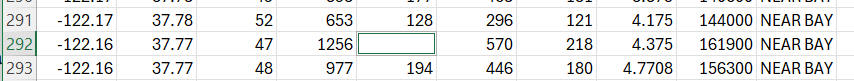

Ways to fix this:
1. Remove corresponding districts (delete the entire row 292) 

`housing.dropna(subset=["total_bedrooms"])` 

2. Remove the entire column (delete the total_bedrooms column) 

`housing.drop("total_bedrooms", axis=1) # option 2` 

3. Set that cell to some value (zero/mean/median....) 

`median = housing["total_bedrooms"].median() # option 3`
`housing["total_bedrooms"].fillna(median, inplace=True) `

Note: If option 3 is chosen, **median** value of total_bedrooms must be calculated.
Median: the number in the middle of the "total_bedrooms" list. Example:

Case 1: `total_bedrooms = [2, 3, 4, 5, 6]` => Median = 4

Case 2: `total_bedrooms = [2, 3, 4, 5, 6, 7]` => Median = (4+5)/2 = 4.5